In [46]:
# Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay

In [11]:
bank_df= pd.read_csv('bank-full.csv',sep=';')

In [12]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [14]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
bank_df.shape

(45211, 17)

In [16]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [17]:
bank_df.duplicated().sum()

0

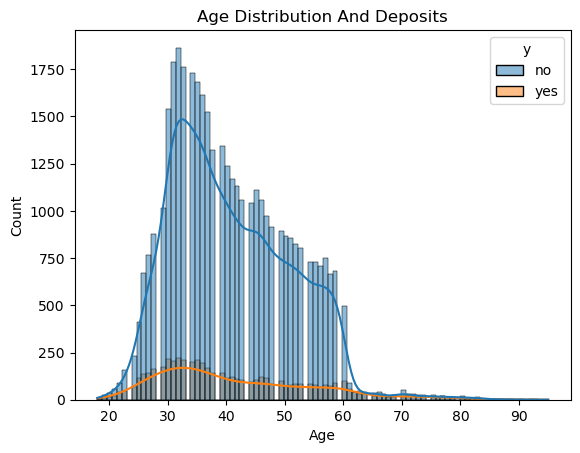

In [18]:
sns.histplot(x='age',data=bank_df, kde=True, hue='y')
plt.xlabel('Age')
plt.title('Age Distribution And Deposits')
plt.show()

**Maximum clients are between the age 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.**

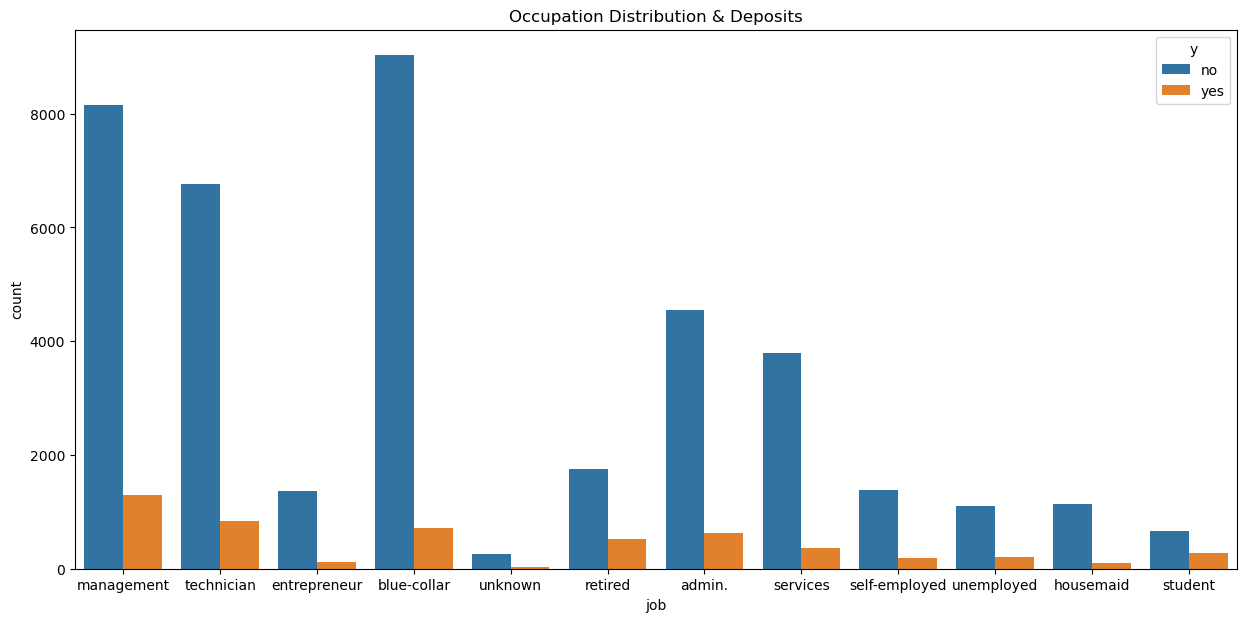

In [19]:
plt.figure(figsize=(15,7))
sns.countplot(x='job', data=bank_df, hue='y')
plt.title('Occupation Distribution & Deposits')
plt.show()

**Majority of clients have occupation 'Management',Admin','blue-collar','technician' and maximum clients subscribing to Term Deposits Also Are From These Occupation.**

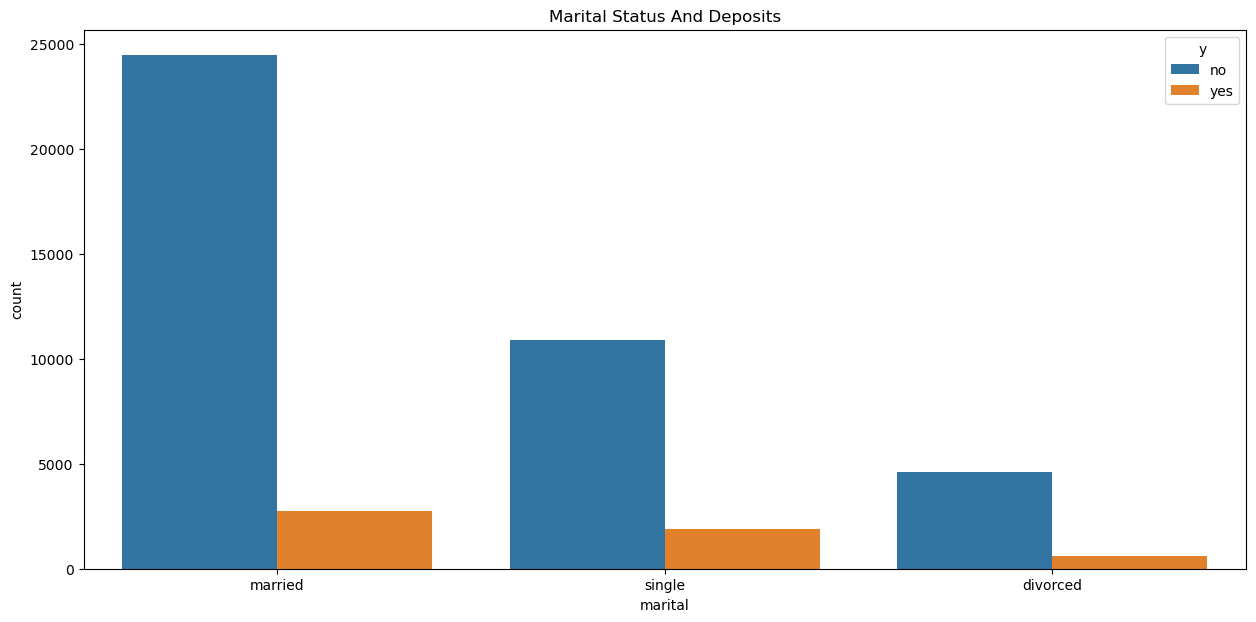

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x='marital', data=bank_df, hue='y')
plt.title('Marital Status And Deposits')
plt.show()

**Clients Are Mostly Married**

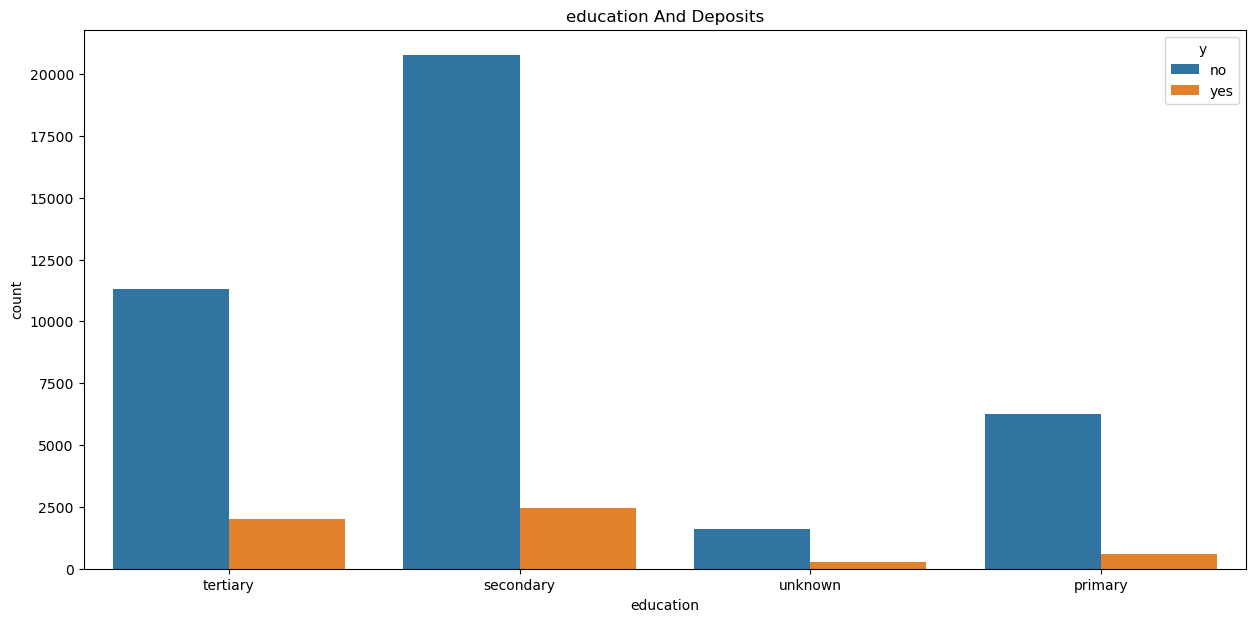

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='education', data=bank_df, hue='y')
plt.title('education And Deposits')
plt.show()

**Most of the Client have Secondary & tertiary Education**

In [22]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [23]:
# Credits Defaults - any
bank_df['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

**Majority of clients do not have any Credit Default Only 815 Clients Have A Credit Default**

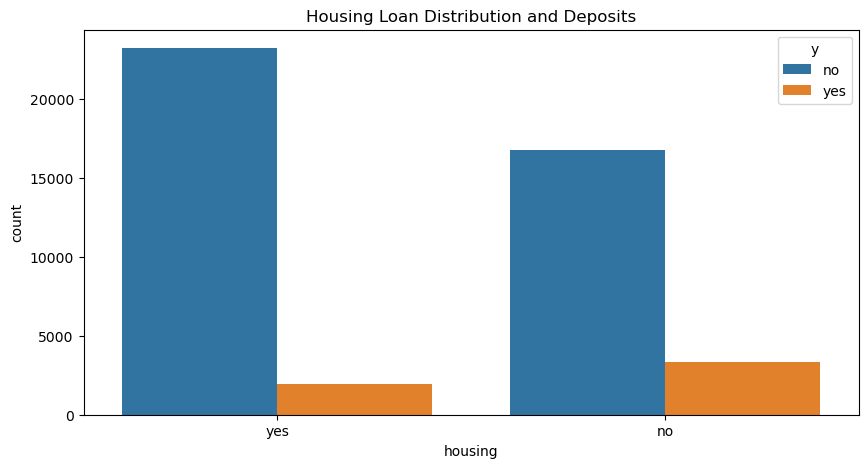

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(x="housing", data= bank_df, hue ="y")
plt.title("Housing Loan Distribution and Deposits")
plt.show()

**Clients Subscribing To Term Deposits Mostly Have Home Loan**

In [25]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


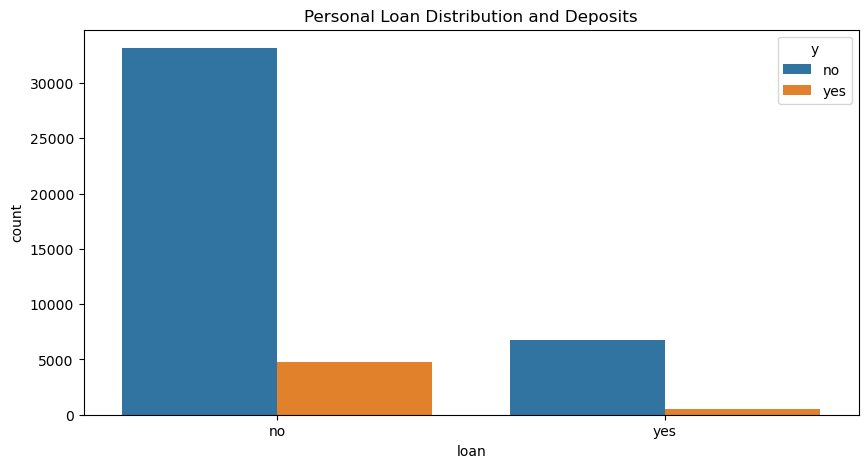

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x="loan", data= bank_df, hue ="y")
plt.title("Personal Loan Distribution and Deposits")
plt.show()

**Most of The Clients Subscribing To Term Deposits Dont have Personal Loan**

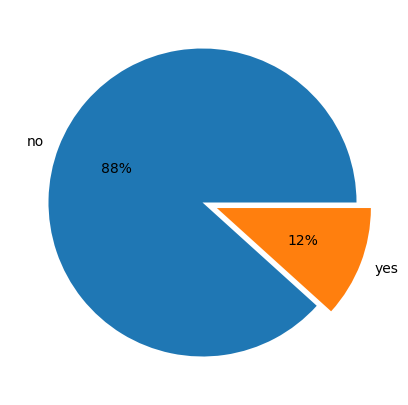

In [27]:
# Count Of Outcome
bank_df.y.value_counts()
keys = bank_df.y.value_counts().index
data = bank_df.y.value_counts().values
plt.figure(figsize=(10,5))
plt.pie(data,labels=keys,explode=[0,0.1],autopct='%.0f%%')
plt.show()

**12% of Clients Have Subscribed To Term Deposit**

In [28]:
# Drop irrelevant columns
bank_df = bank_df.drop(['duration', 'contact', 'month', 'pdays', 'previous', 'poutcome'], axis=1)

In [29]:
# Label Encoding Categorical Features
cols = bank_df.select_dtypes('O').columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'y'], dtype='object')

In [30]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,day,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,5,1,no
1,44,technician,single,secondary,no,29,yes,no,5,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,1,no
4,33,unknown,single,unknown,no,1,no,no,5,1,no


In [31]:
le = LabelEncoder()
bank_df[cols] =bank_df[cols].apply(le.fit_transform)

In [32]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,day,campaign,y
0,58,4,1,2,0,2143,1,0,5,1,0
1,44,9,2,1,0,29,1,0,5,1,0
2,33,2,1,1,0,2,1,1,5,1,0
3,47,1,1,3,0,1506,1,0,5,1,0
4,33,11,2,3,0,1,0,0,5,1,0


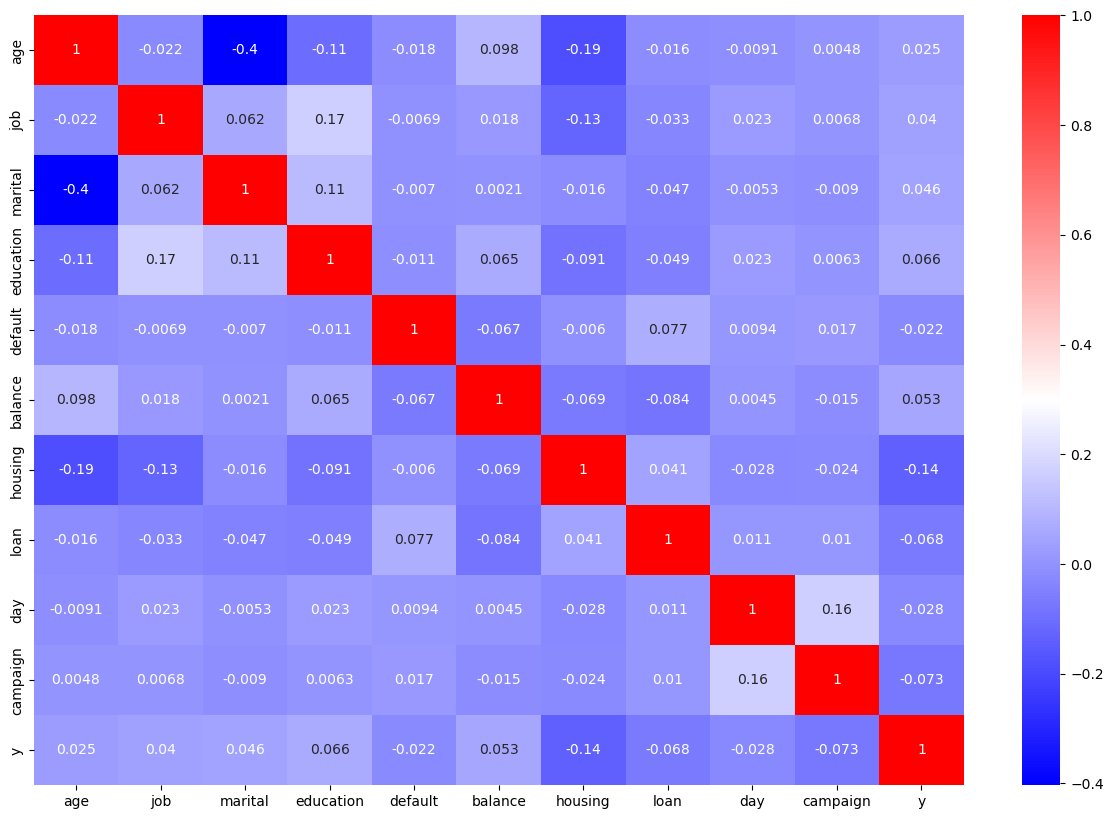

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(bank_df.corr(), cmap='bwr', annot=True)
plt.show()

In [34]:
# split Feacture & target Variable
x= bank_df.drop('y',axis=1)
y= bank_df['y']

# split data into training & testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
print('Train Score: {}'.format(dt_classifier.score(x_train, y_train)))  
print('Test Score: {}'.format(dt_classifier.score(x_test, y_test)))

Train Score: 0.9996524157108099
Test Score: 0.8070628133294013


In [51]:
cross_val_score(dt_classifier,x_train, y_train, cv=5).mean()

0.8076596084574703

In [36]:
y_pred = dt_classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [52]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10502  1464]
 [ 1153   445]]


In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8070628133294013


In [39]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     11966
           1       0.23      0.28      0.25      1598

    accuracy                           0.81     13564
   macro avg       0.57      0.58      0.57     13564
weighted avg       0.82      0.81      0.81     13564



In [53]:
# HyperParameter Tunning
param_grid = {'max_depth':[3,5,7,10,None],'criterion':['gini','entropy'],'min_samples_leaf':[3,5,7,9,10,20]}

In [55]:
gscv = GridSearchCV(dt_classifier, param_grid, cv=5, verbose=1)
gscv.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [56]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 3}

In [57]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3,
                       random_state=42)

In [58]:
cross_val_score(gscv.best_estimator_, x_train, y_train, cv=5).mean() 

0.8833696689952741

**Now We Will Use This Best Estimator To Built Our Model**

In [60]:
clf= DecisionTreeClassifier(criterion='entropy',max_depth=7,min_samples_leaf=3)
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=3)

In [62]:
print('Train Score: {}'.format(clf.score(x_train, y_train)))
print('Test Score: {}'.format(clf.score(x_test, y_test)))

Train Score: 0.8853603817107467
Test Score: 0.8815246240047184


In [64]:
pred_y = clf.predict(x_test)
pred_y

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
conf_matrix = confusion_matrix(y_test, pred_y)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[11886    80]
 [ 1527    71]]


In [67]:
accuracy = accuracy_score(y_test, pred_y)
print("Accuracy:", accuracy)

Accuracy: 0.8815246240047184


In [68]:
class_report = classification_report(y_test, pred_y)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11966
           1       0.47      0.04      0.08      1598

    accuracy                           0.88     13564
   macro avg       0.68      0.52      0.51     13564
weighted avg       0.84      0.88      0.84     13564



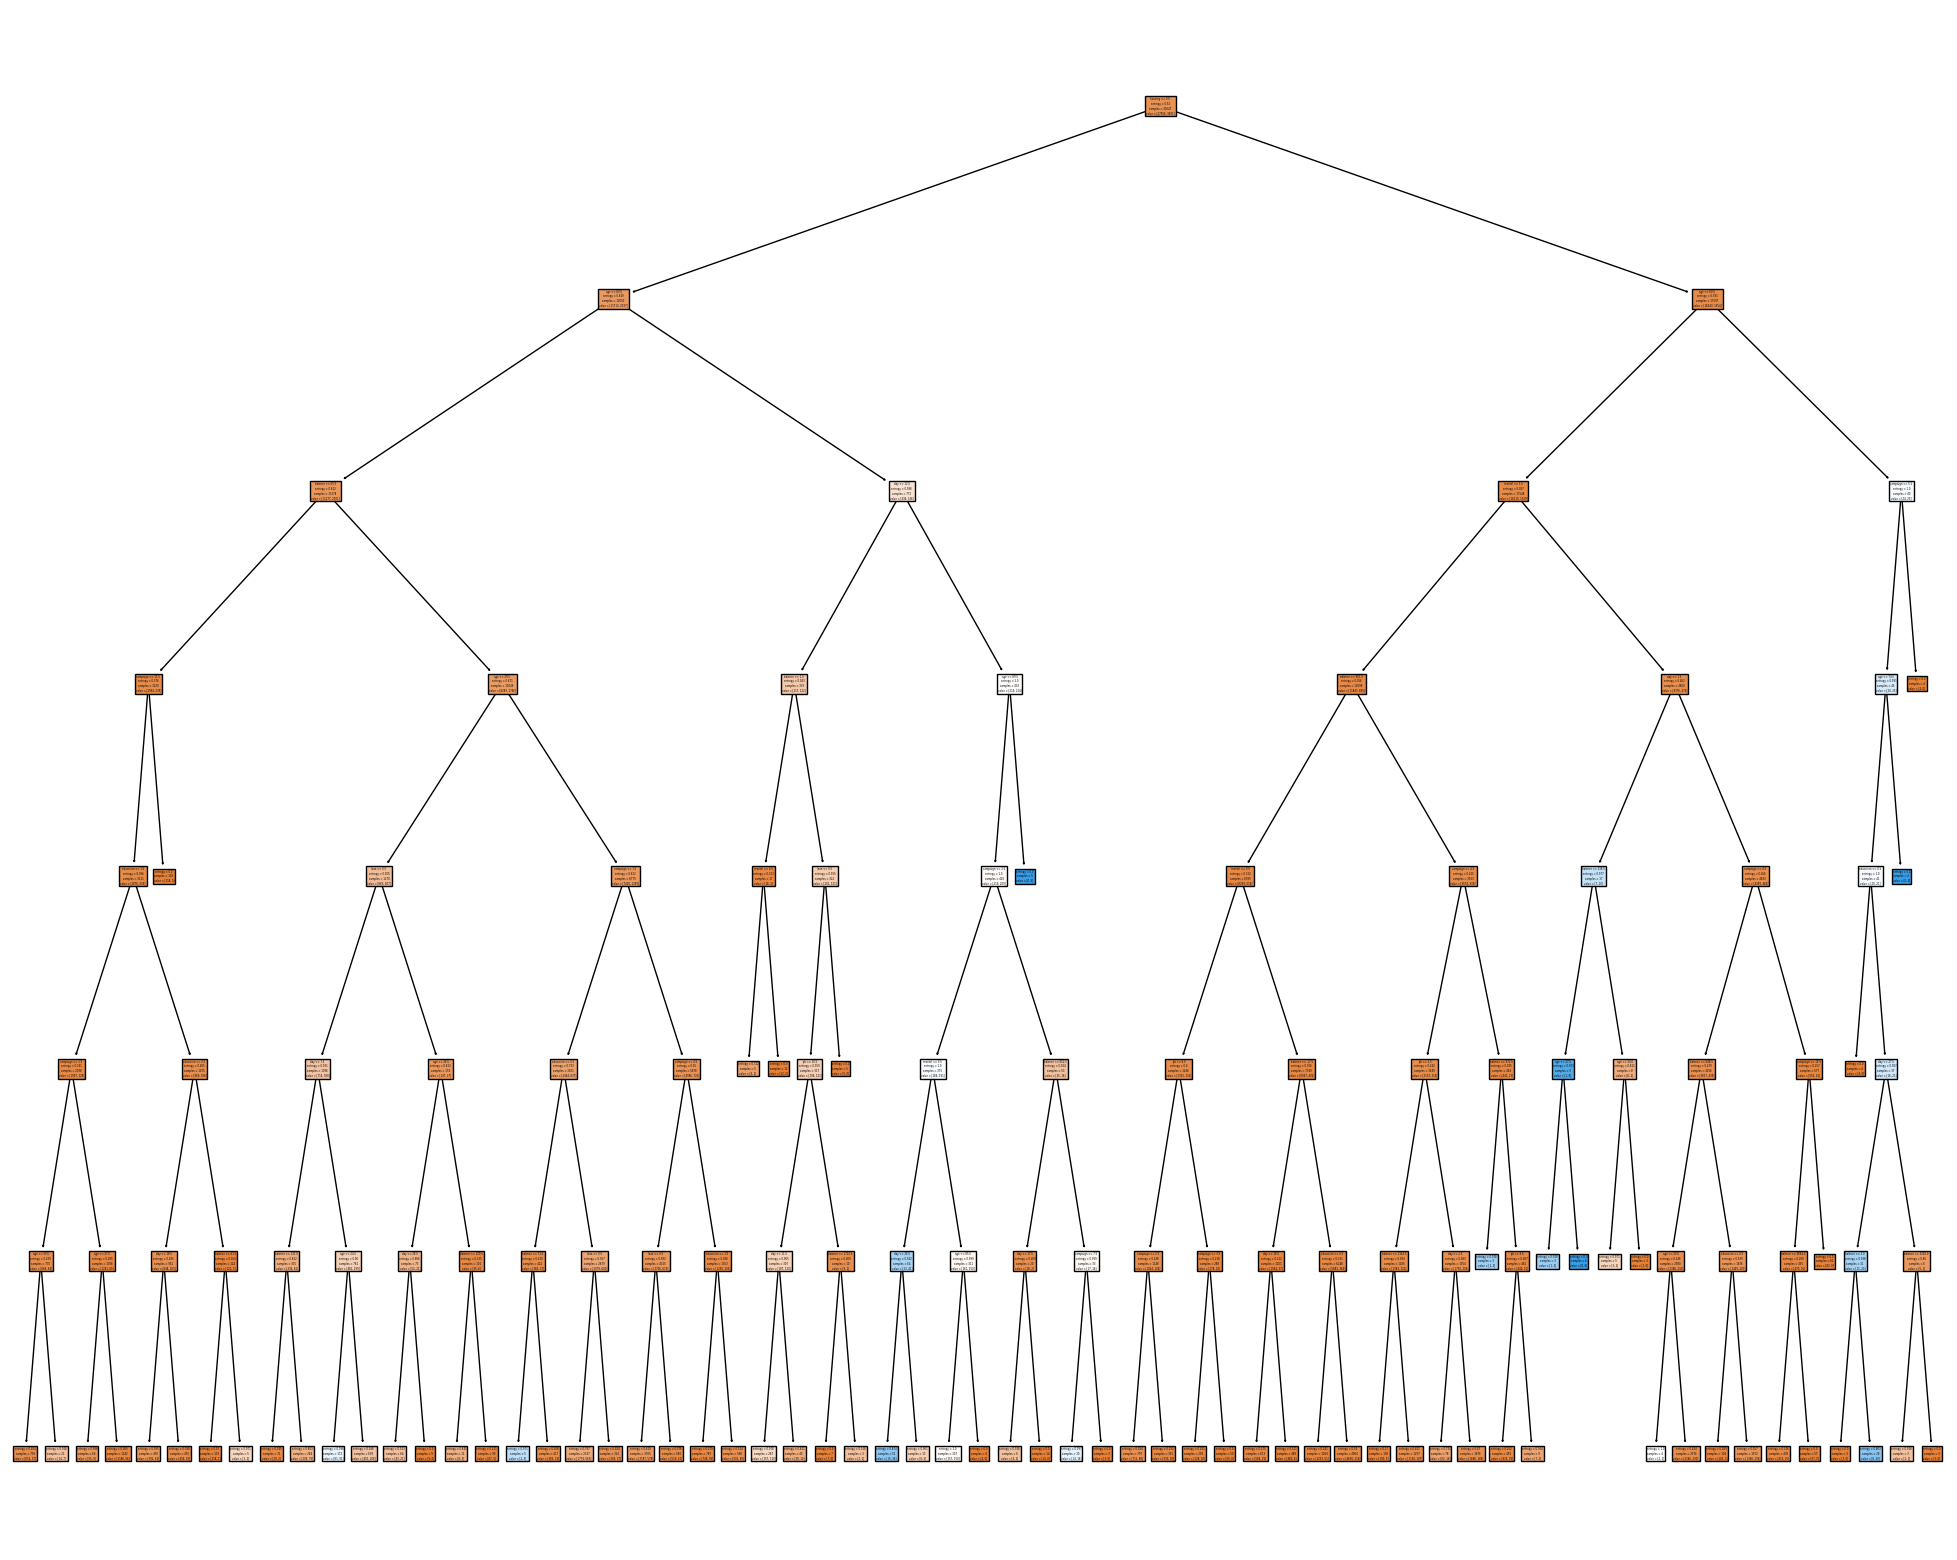

In [71]:
feature_names = list(x.columns)

# Plot the decision tree
fig = plt.figure(figsize=(25, 20))
t = tree.plot_tree(clf, filled=True, feature_names=feature_names)

In this project, we embarked on a journey to build a predictive model for term deposit subscriptions in a banking context to help a Portuguese banking institution tailor its marketing efforts effectively.

**Insights:**

After building and tuning the decision tree classifier, the model achieved a test accuracy of around 89%, indicating that it can predict whether a client will subscribe to a term deposit with relatively high accuracy. However, it's essential to consider other metrics like precision, recall, and F1-score to get a comprehensive understanding of the model's performance.